In [51]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [52]:
nPerClust = 300
blur = 1.5

A = [1,1]
B = [5, 1]
C = [4, 3]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

labels_np = np.hstack((np.zeros((nPerClust)), np.ones((nPerClust)), 1+np.ones((nPerClust))))

data_np = np.vstack((np.array(a).T, np.array(b).T, np.array(c).T))

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long()


In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

datasetTrain = TensorDataset(X_train, y_train)
datasetTest = TensorDataset(X_test, y_test)

batch_size = 16
train_loader = DataLoader(datasetTrain, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(datasetTest, batch_size=datasetTest.tensors[0].shape[0])

In [54]:
def creatAnn(optimAlgo, lr):
    class ANN(nn.Module):
        def __init__(self):
            super().__init__()
            self.input = nn.Linear(2,8)

            self.fc1 = nn.Linear(8,8)

            self.output = nn.Linear(8,3)



        def forward(self,x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            return self.output(x)
        
    net = ANN()
    lossfun = nn.CrossEntropyLoss()
    optifun = getattr(torch.optim, optimAlgo)
    optimizer = optifun(net.parameters(), lr=lr)
    
    return net, lossfun, optimizer


In [55]:

def trainModel(ann, lossfun, optimizer):
    testAcc = []
    
    for epoch in range(50):
        ann.train()
        for X,y in train_loader:
            y_pred = ann(X)
            
            loss = lossfun(y_pred,y)
            
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
        ann.eval()
        X,y = next(iter(test_loader))
        with torch.no_grad():
            y_pred = ann(X)
            
        testAcc.append(100*(torch.mean((torch.argmax(y_pred, axis=1) == y).float()).item()))
        
    return np.mean(testAcc[:-10])

In [56]:
optimns = ["SGD","Adam", "RMSprop"]
lrs = np.logspace(-4, -1, 20)
test = [[] for i in range(len(optimns))]


for i_opt in range(len(optimns)):
    for lr in lrs:
        net, lossfun, optimizer = creatAnn(optimns[i_opt], lr)
        a = trainModel(net, lossfun, optimizer)
        test[i_opt].append(a)

In [57]:
test_np = np.array(test)


Text(0.5, 0, 'Accuracy')

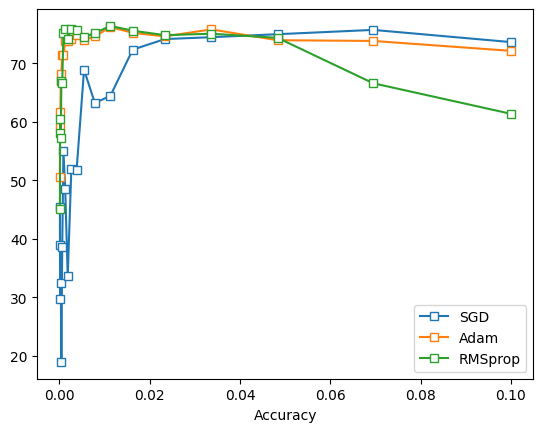

In [58]:
for i in range(len(optimns)):
    plt.plot(lrs, test_np[i], "s-", markerfacecolor="w")
    
plt.legend(optimns)
plt.xlabel("Lr")
plt.xlabel("Accuracy")


In [59]:
test_np

array([[45.4583326 , 29.72222246, 38.88888955, 32.45833412, 18.93055592,
        38.65277804, 54.94444445, 48.58333401, 33.55555631, 51.916667  ,
        51.69444442, 68.91666621, 63.20833296, 64.4583334 , 72.34722205,
        74.15277779, 74.47222233, 74.98611152, 75.72222248, 73.63888875],
       [50.62500037, 59.1527779 , 61.62499987, 66.99999981, 68.24999981,
        71.49999969, 71.34722218, 73.75      , 73.805556  , 74.13888931,
        74.87499997, 74.00000021, 74.59722221, 76.20833352, 75.22222251,
        74.61111099, 75.80555603, 73.95833313, 73.8333334 , 72.13888898],
       [45.12500033, 58.08333322, 60.52777782, 57.27777809, 67.05555461,
        66.65277697, 75.15277833, 75.90277791, 74.19444472, 75.93055561,
        75.75000048, 74.49999958, 75.18055588, 76.40277848, 75.58333322,
        74.81944412, 75.06944418, 74.36111107, 66.59722194, 61.37500025]])